In [1]:
import numpy as np
import matplotlib.pyplot as plt

$\epsilon_s \approx 0.96-0.99$ for snow $\implies$ want $\epsilon_s$ to within $0.01$.


$\Large{ \epsilon_s = \frac{L^{\uparrow}_{det} - \tau^2 L^{\downarrow}_{det} - (1-\tau)B_{atm}}{\tau B_{surf} - \tau^2L^{\downarrow}_{det}}} \equiv \frac{(N)}{(D)}$,

>where

>$\large{B(T)= \frac{2hc^2 \nu^3}{exp\left(\frac{hc\nu}{k_B T}\right) -1}} \equiv \frac{(1*)}{(2*)}$



In [2]:
# estimate std on B by propagating uncertainty on temperatures

h = 6.626e-34
c = 3.0e+8
k = 1.381e-23


def B(nu, T, s_T):
    """
    Calculate uncertainty for a given BB radiance at some wavenumber and temperature
    Input: nu (wavenumber units: cm^{-1}), and temperature T (units: Kelvin) - (Integers or Floats)
    Output: spectral radiance uncertainty (units: W m^{-2} sr^{-1} cm^{-1}) - (Float)
    """
    planck_a = 2*h*(c**2)
    planck_e = h*c/k
    B = 100*planck_a*((nu*100)**3)/(np.exp(planck_e*(nu*100)/T)-1)   

    eqn_1 = 2*h*(c**2)*(nu**3)  #(1*)
    z = (h*c*nu)/(k*T)          #exponential in (2*)
    eqn_2 = (np.exp(z)-1)**(-1) #(2*)

    s_1 = 6*h*(c**2)*(nu**2)*s_nu                           #std dev in eqn_1

    s_z = z * np.sqrt((s_nu/nu)**2 + (s_T/T)**2)            #std dev in z
    s_2 = np.exp(z) * (np.exp(z) - 1)**(-2) * s_z           #std dev in eqn_2

    s_B = B * np.sqrt((s_1/ eqn_1)**2 + (s_2/ eqn_2)**2)    #std dev in B(T_s)
    
    return B, s_B

In [3]:
# denote sigma by s in front of variable name

In [4]:
nu = 450 # start by doing it for one wavenumber - later can vecotrise over many wavenumbers
s_nu = 0.5 #uncertainty on wavenumber

# Propagate uncertainties on temperatures (in Kelvin) to find uncertainties on BB emissions

T_atm = 280
s_T_atm = .1

T_surf = 270
s_T_surf = 1

B_atm, s_B_atm = B(nu, T_atm, s_T_atm)
B_surf, s_B_surf = B(nu, T_surf, s_T_surf)

tau = .98 # Laura can give us better estimate as function of wavenumber
s_tau = .05

L_up = 0.09 # can assume B_up B-inst = B_up*tau+(1-tau)*B_atm
s_L_up = 0.05/100 * L_up #response function varies by approx 0.05 % within time it takes to make a measurement
#see Jons estimate for NESR, use realistic range of error and see effect it has

L_down = .1 #for nu=450
s_L_down = 0.05/100 * L_down #response function varies by approx 0.05 % within time it takes to make a measurement

In [5]:
# Estimate downwelling radiation and uncertainty

<img src="files/downwelling_radiance_alaska.jpg">

In [6]:
N = L_up - (tau**2)*L_down - (1-tau)*B_atm
D = tau*B_surf - (tau**2)*L_down

emissivity = N/D

sN1 = s_L_up**2
sN2 = (tau**4)*(L_down**2)*(4*(s_tau/tau)**2+(s_L_down/L_down)**2)
sN3 = s_B_atm**2
sN4 = (tau**2)*(B_atm**2)*((s_tau/tau)**2+(s_B_atm/B_atm)**2)

s_N = (sN1+sN2+sN3+sN4)**0.5

sD1 = (tau**2)*(B_surf**2)*((s_tau/tau)**2+(s_B_surf/B_surf)**2)
sD2 = (tau**4)*(L_down**2)*(4*(s_tau/tau)**2+(s_L_down/L_down)**2)

s_D = (sD1+sD2)**0.5

s_emissivity = emissivity*((s_N/N)**2+(s_D/D)**2)**0.5

print('emissivity = ' + str(emissivity))
print('uncertainty emissivity = ' + str(s_emissivity))

emissivity = -0.814826763354
uncertainty emissivity = -1.42074765694


In [7]:
L_up_array = np.arange(0.07,0.11,0.01)
emissivities = []
s_emissivities = []

L_down_array = np.arange(0.002,0.14,0.002)


for L_down in L_down_array:
    N = L_up - (tau**2)*L_down - (1-tau)*B_atm
    D = tau*B_surf - (tau**2)*L_down

    emissivity = N/D
    
    sN1 = s_L_up**2
    sN2 = (tau**4)*(L_down**2)*(4*(s_tau/tau)**2+(s_L_down/L_down)**2)
    sN3 = s_B_atm**2
    sN4 = (tau**2)*(B_atm**2)*((s_tau/tau)**2+(s_B_atm/B_atm)**2)

    s_N = (sN1+sN2+sN3+sN4)**0.5
    
    sD1 = (tau**2)*(B_surf**2)*((s_tau/tau)**2+(s_B_surf/B_surf)**2)
    sD2 = (tau**4)*(L_down**2)*(4*(s_tau/tau)**2+(s_L_down/L_down)**2)

    s_D = (sD1+sD2)**0.5
    
    s_emissivity = emissivity*((s_N/N)**2+(s_D/D)**2)**0.5
    
    emissivities.append(emissivity)
    s_emissivities.append(s_emissivity)

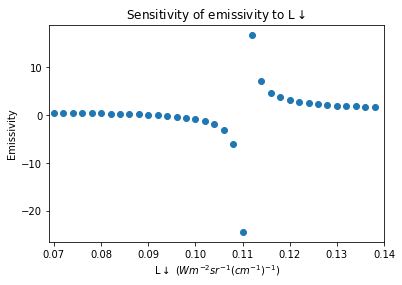

In [8]:
plt.scatter(L_down_array,emissivities)
plt.title('Sensitivity of emissivity to L$\downarrow$')
plt.xlabel('L$\downarrow$ ($W m^{-2} sr^{-1} (cm^{-1})^{-1}$)')
plt.ylabel('Emissivity')
plt.xlim((0.069,0.14))
plt.show()

In [ ]:
# problem is values are not independent of each other. If dowwelling changes, other parameters such as temperature also need to change

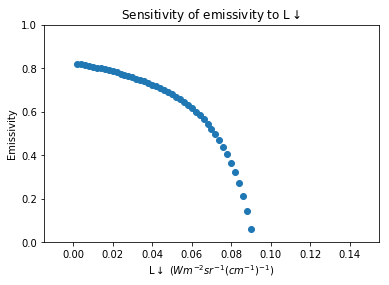

In [9]:
plt.scatter(L_down_array,emissivities)
plt.title('Sensitivity of emissivity to L$\downarrow$')
plt.xlabel('L$\downarrow$ ($W m^{-2} sr^{-1} (cm^{-1})^{-1}$)')
plt.ylabel('Emissivity')
plt.ylim((0,1))
#plt.xlim((0.065,0.095))
plt.show()